# Project 4: Poisonous Mushrooms

**Solution**

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

## Grading
---
- Make sure to answer every part in every question.
 - There are 6 equally weighted questions.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean and well commented, 
   - and if the functions or answers are too long.

 ## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Question 1:PCA and fraction of total variance
---

1. Do a principal components analysis on the data.
1. Print what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].
1. Show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.
1. You only need to call PCA.fit once.

Notes:
* The pandas DataFrame [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html) function may be helpful.
* You can use `PCA` to produce a PCA analysis.

Fraction of the total variance explained by first k principal components:

 K  Fraction of Variance Explained  Cumulative Variance Explained
 1                        0.164043                       0.164043
 2                        0.133235                       0.297278
 3                        0.101735                       0.399013
 4                        0.070634                       0.469646
 5                        0.038666                       0.508313
10                        0.022309                       0.652215
20                        0.011464                       0.808968
30                        0.007003                       0.898549
40                        0.004398                       0.950928
50                        0.002045                       0.982103


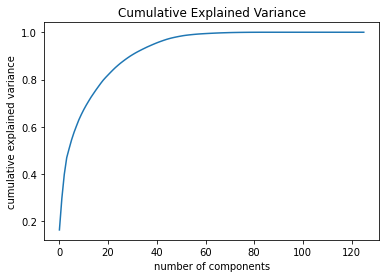

In [5]:
def P1():
    ## STUDENT START ###
    """
    Input: train data
    Purpose: produce principal component analysis & cumulative explained variance graph
    """
    
    # create PCA 
    pca = PCA()
    X_train_pca = pca.fit_transform(train_data)
    
    klist = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    # print fraction of the total variance in the 
    # training data is explained by the first k principal components  
    df = pd.DataFrame({'K': range(1, len(pca.explained_variance_ratio_)+1),
                      'Fraction of Variance Explained': pca.explained_variance_ratio_,
                      'Cumulative Variance Explained': np.cumsum(pca.explained_variance_ratio_)})
    print('Fraction of the total variance explained by first k principal components:')
    print('')
    print(df[df['K'].isin(klist)].to_string(index=False))
    
    # plot cumulative explained variance
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')  
    plt.title('Cumulative Explained Variance')
    
        
    ## STUDENT END ###

P1()

### Question 2: PCA for visualization

PCA can be very useful for visualizing data. 
1. Project the training data down to 2 dimensions and show as a square scatterplot.
  - Show poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
  - Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.
* Be sure to add a title, axis labels and a legend to your graph.

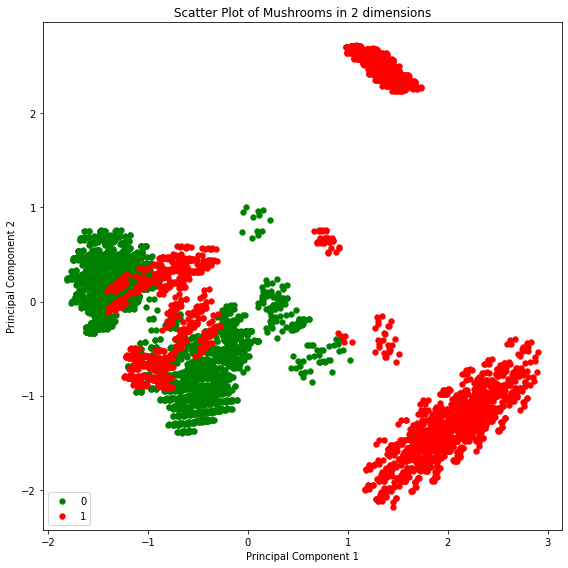

In [6]:
def Q2():   
  ### STUDENT START ###
    """
    Input: training data 
    Purpose: project the training data down to 2 dimensions and show as a square scatterplot
    """
    
    # create pca with 2 components
    pca = PCA(n_components = 2)
    X_train_pca = pca.fit_transform(train_data)

    colors = ['g', 'r']
    plt.figure(figsize=(8, 8))
    
    # create scatter plot
    for l, c in zip(np.unique(train_labels), colors):
        plt.scatter(X_train_pca[train_labels==l, 0],
                   X_train_pca[train_labels==l, 1],
                   c=c, label = l, linewidth = 0.3)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc = 'lower left')
    plt.title('Scatter Plot of Mushrooms in 2 dimensions')
    plt.tight_layout()
    plt.show()
        
  ### STUDENT END ###

Q2()

### Question 3: Visualizing GMMs
---

1. Fit a k-means cluster model with 6 clusters over the 2d projected data. 
  - As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  
  - For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

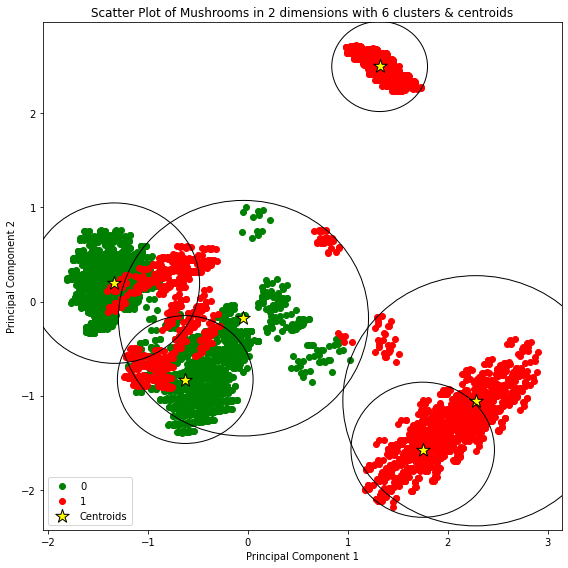

In [7]:
def Q3():   
  ### STUDENT START ###
    """
    Input: training data 
    Purpose: mark the centroid and plot a circle that goes through the cluster's example
    """
    # create pca with 2 components
    pca = PCA(n_components = 2)
    X_train_pca = pca.fit_transform(train_data)
    
    # create K-means cluster with 6 clusters
    km = KMeans(n_clusters=6)
    y_km = km.fit(X_train_pca)
    
    # visualize cluster predictions
    colors = ['g', 'r']
    figure, axes = plt.subplots(figsize = (8, 8))
    predictions = km.predict(X_train_pca)

    for l, c in zip(np.unique(train_labels), colors):
        plt.scatter(X_train_pca[train_labels==l, 0],
                   X_train_pca[train_labels==l, 1],
                   c=c, label = l)
    
    # visualize centroids of the 6 clusters
    centroids = km.cluster_centers_

    plt.scatter(centroids[:, 0],
                centroids[:, 1],
                s=200, marker='*',
                c='yellow', edgecolor='black',
                label='Centroids')

    # draw circles
    dist = lambda x, y: np.linalg.norm(x-y) # determine distance (dissimilarity) between observations 
    for i, centroid in enumerate(centroids):
        farthest = centroid
        for j, k in enumerate(X_train_pca):
            if predictions[j] != i:
                continue
            if dist(centroid, k) > dist(centroid, farthest):
                farthest = k
        radius = dist(centroid, farthest) # use the distance between centroids & farthest point as radius
        c = plt.Circle(centroid, radius, color = 'k', fill = False) # draw circles
        axes.add_artist(c)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc = 'lower left')
    plt.title('Scatter Plot of Mushrooms in 2 dimensions with 6 clusters & centroids')
    plt.tight_layout()
    plt.show()
    
  ### STUDENT END ###

Q3()

### Question 4: Understanding GMMs with Density Plots
---

1. Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. 
  - Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  
  - Show a 4x4 grid of square-shaped plots of the estimated density contours. 
    - Each row showing a different number of mixture components. 
    - Each column showing a different convariance matrix type.  
1. Be sure to add a title for each plot in the grid to indicate what parameters were used.
1. How are the covariance types 'tied' and 'full' different? How do you see it in the plots?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

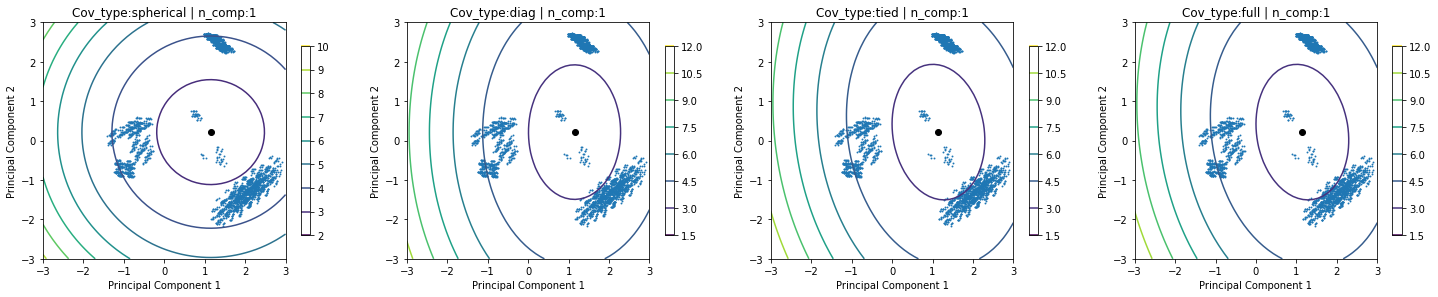

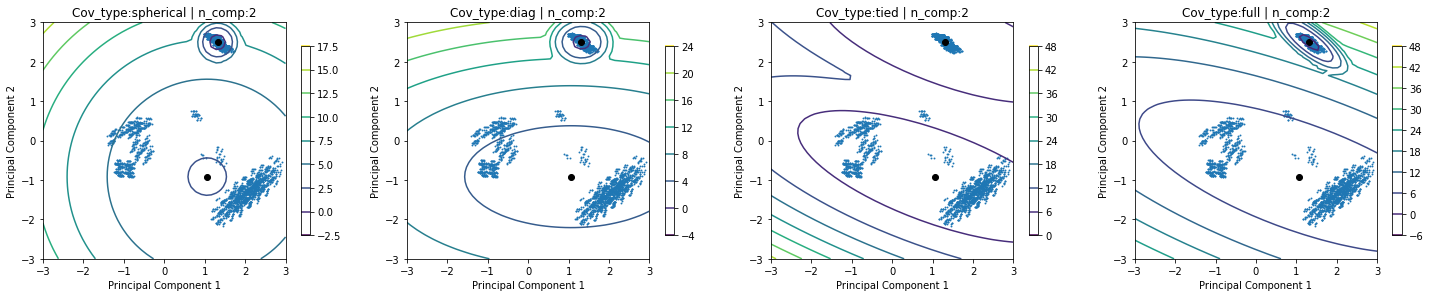

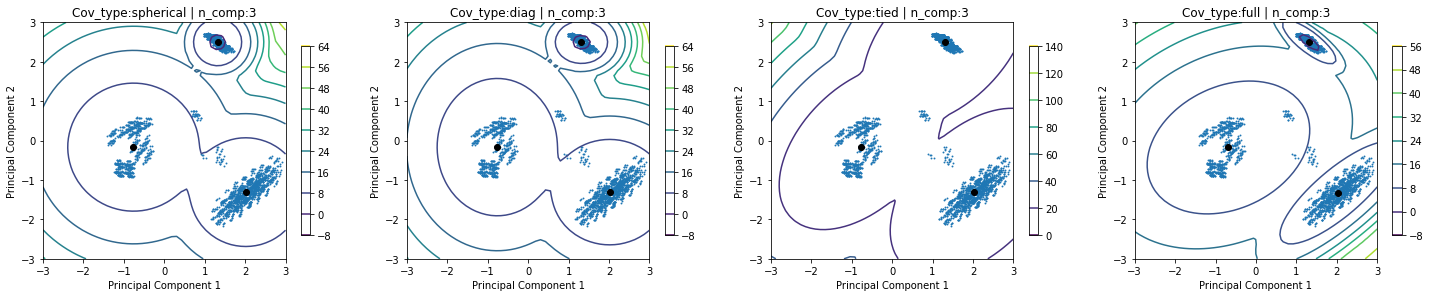

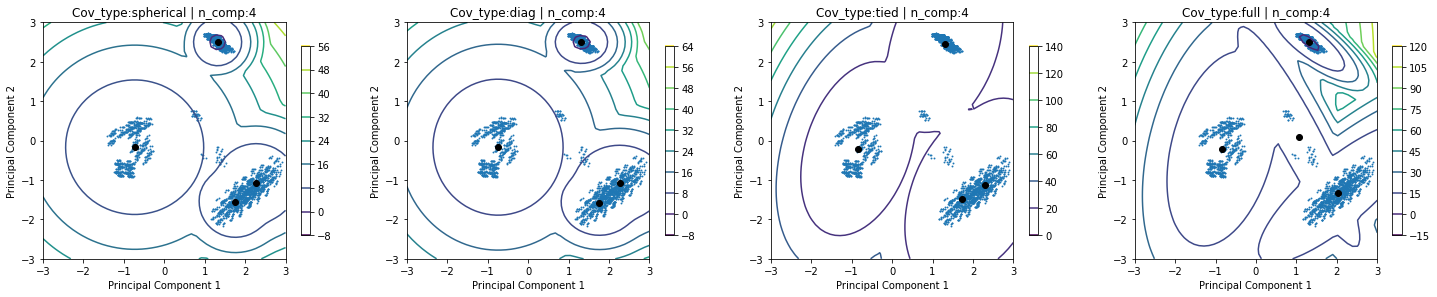

In [8]:
def Q4():
    ### STUDENT START ###
    """
    Input: training data 
    Purpose: Show a 4x4 grid of square-shaped plots of the estimated density contours
    """
    # create pca with 2 components
    pca = PCA(n_components = 2)
    X_train_pca = pca.fit_transform(train_data)    
    X_train = X_train_pca[train_labels == 1] # select only poisonous examples
    
    # fit GMM models with components & coverance matrix types
    cov_type = ['spherical', 'diag', 'tied', 'full']

    for j in range(1,5): 
        plt.figure(figsize = (25, 20))
        for i in range(len(cov_type)):
            ax = plt.subplot(4, 4, i+1)

            gmm = GaussianMixture(
            n_components= j,
            covariance_type= cov_type[i], random_state=12345 )

            y_gmm = gmm.fit_predict(X_train)

            x = np.linspace(-3.0, 3.0)
            y = np.linspace(-3.0, 3.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z)
            CB = plt.colorbar(CS, shrink=0.8, extend="both")

            plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)
            plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color="black")
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.title('Cov_type:'+ cov_type[i]+' | n_comp:'+str(j))
         
    
    ### STUDENT END ###

Q4()

Answer: Gaussian mixture model uses covariance type to determine the distribution. For covariance type full, each GMM component has a full covariance matrix. From the graph above, we can see each cluster has different shapes and orientations. It seems that the data points on the upper right cornor were captured nicely with coverance type full. For covariance type tied, all components share a single covariance matrix. Hence, the clusters have similar shapes and orientation.


### Question 5: Using Unsupervised models for classification...?
---

1. Fit two Gaussian mixture models:
  - On your 2d projected training data. 
    - Form a subset of all the poisonous examples and fit one GMM (gmm_poison).
    - Form a subset of all the non-poisonous examples and fit another GMM (gmm_nonpoison).
  - Use 4 mixture components and full convariance for each model.  
1. Use the above trained GMMs to classify examples in your test set:
   - For each example in the test set
     - Measure how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples).
     - Predict the more likely label.
  - You can use score_samples.
  - You can do this without a for loop which will be more efficient.
1. What is the accuracy of the predictions on the test data? (we expect it to be about 0.95)

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def Q5():
    
  ### STUDENT START ###
    """
    Input: training data, testing data
    Purpose: use 2 GMM models to classify examples in test set and obtain accuracy
    """
    pca = PCA(n_components = 2)
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = pca.transform(test_data)

    # seperate dataset to poisonous and non-poisonous
    X_train_np = train_data_pca[train_labels == 0]
    X_train_p = train_data_pca[train_labels == 1]

    # fit GMM models with 4 mixture components and full convariance 
    gmmn = GaussianMixture(n_components= 4, covariance_type= 'full')
    gmmp = GaussianMixture(n_components= 4, covariance_type= 'full')

    gmmn.fit(X_train_np)
    gmmp.fit(X_train_p)

    scores_np = gmmn.score_samples(test_data_pca)
    scores_p = gmmp.score_samples(test_data_pca)
    
    preds = []

    for p, np in zip(scores_p, scores_np):
        if p > np:
            preds.append(1)
        else:
            preds.append(0)
    
    # Calculate accuracy
    correct = 0
    for pred, label in zip(preds, test_labels):
        if pred == label:
            correct+=1
    accuracy_rate = round(correct/len(test_labels),4)
    print('GMM Accuracy:', accuracy_rate)
    
  ### STUDENT END ###

Q5()

GMM Accuracy: 0.9502


### Question 6: Understanding the GMM parameters
---

1. Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.
1. Print the best configuration and accuracy.
1. Plot a scatter plot of accuracy vs #params.
1. Bonus: Provide a better visualization by showing all four: accuracy, number of parameters, the covariance type and the number of PCA dimensions.



Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* [This spreadsheet](https://docs.google.com/spreadsheets/d/1LTEOU7q_Tgs4bX_3o2ePjDQrTRToZoc1J5XLlaRbmI0/edit?usp=sharing) should help (accessible from your google @berkeley.edu account)

* Spherical - Each GMM component has a mean per dimension, and one variance. 
* Diag - Each GMM component has a mean per dimension and a variance for each dimension.
* full - Each GMM component has a mean per dimension and a "full" covariance matrix. Only the covariance matrix is symmetric, so its $[i,j]$ entry would equal to its $[j,i]$ entry.
* tied - Finally, tied has all components share a single covariance matrix. So each GMM component has a mean per dimension but they all share the same 'full' covariance matrix.

--- Print the best configuration and accuracy --- 
Best Accuracy: 0.9697508897
Count of Principal Components: 4
Count of GMM components: 3
Covariance Type: tied
Count of Total Parameters: 48.0

--- Print the scatter plot of GMM Experiments --- 


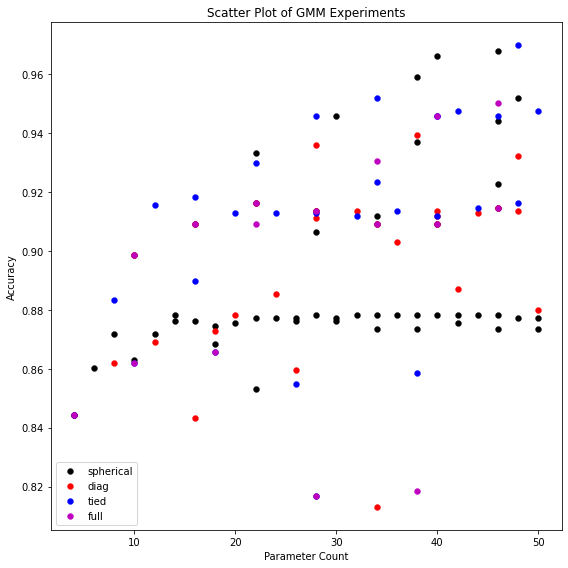

--- Print the scatter plot of GMM Experiments with parameters, accuracy & principal components --- 


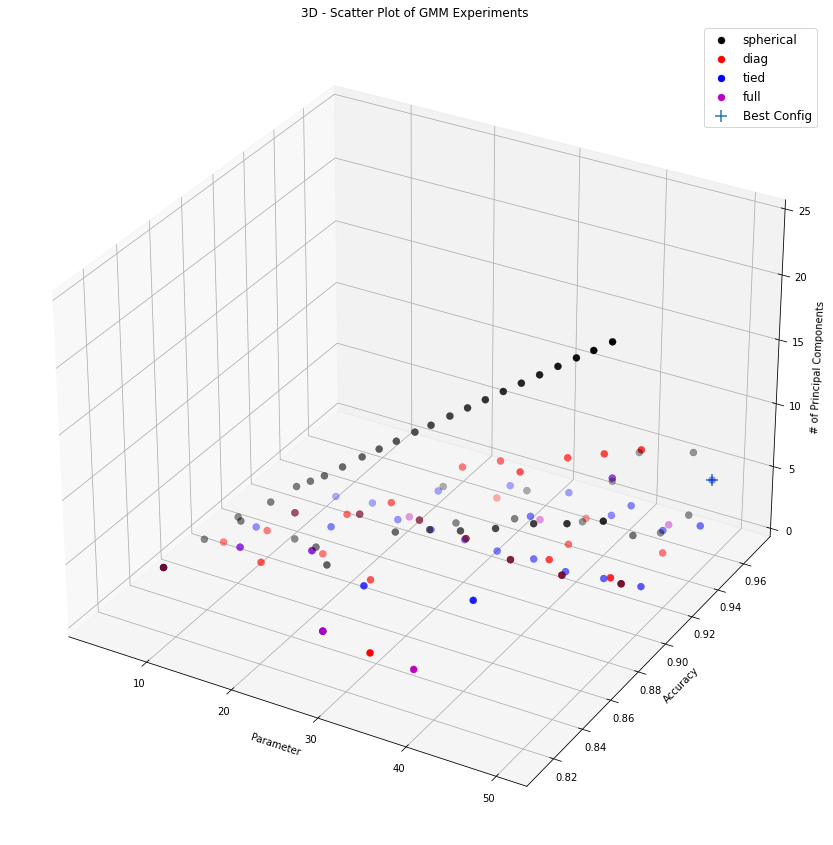

In [10]:
from matplotlib.lines import Line2D

def Q6():
  ### STUDENT START ###
    """
    Input: training data, testing data
    Purpose: experiments to find the Gaussian mixture model with less than 50 parameters
    """
    n_class = 2
    best_accuracy = 0
    best_n_var_pca = 0
    best_n_component_gmm = 0
    best_cov_type = 0
    params = []
    accuracy = []
    cov_type_list = []
    pca_n = []
    gmm_n = []

    for n_var_pca in range(1,50):
        for n_component_gmm in range(1,50):
            for cov_type in ['spherical', 'diag', 'tied', 'full']:
                if cov_type == 'spherical':
                    # Spherical has a mean per dimension and one variance
                    n_params = ((n_component_gmm-1)+(n_var_pca*n_component_gmm)+n_component_gmm)* n_class
                elif cov_type == 'diag':
                    # Diag has a mean per dimension and a variance per dimension
                    n_params = ((n_component_gmm-1)+n_var_pca*n_component_gmm+ n_var_pca*n_component_gmm)* n_class                
                elif cov_type == 'tied':
                    # Tied has a mean per dimension and shares same covariance matrix
                    n_params = ((n_component_gmm-1)+n_var_pca*n_component_gmm+n_var_pca*(n_var_pca+1)/2)* n_class                 
                else:
                    # Full has a mean per dimension and a full covariance matrix
                    n_params = ((n_component_gmm-1)+n_var_pca*n_component_gmm+n_var_pca*(n_var_pca+1)/2*n_component_gmm)*n_class                          

                if n_params <= 50:

                    params.append(n_params)
                    cov_type_list.append(cov_type)
                    pca_n.append(n_var_pca)
                    gmm_n.append(n_component_gmm)

                    pca = PCA(n_components = n_var_pca)
                    train_data_pca = pca.fit_transform(train_data)
                    test_data_pca = pca.transform(test_data)

                    # Train gmm with non-poisonous data
                    X_train_np = train_data_pca[train_labels == 0]
                    gmm_np = GaussianMixture(n_components= n_component_gmm, 
                                covariance_type= cov_type, random_state=12345)
                    gmm_np.fit(X_train_np)
                    pred_test_np = gmm_np.score_samples(test_data_pca)

                    # Train gmm with poisonous data
                    X_train_p = train_data_pca[train_labels == 1]                       
                    gmm_p = GaussianMixture(n_components= n_component_gmm, 
                                          covariance_type= cov_type, random_state=12345)
                    gmm_p.fit(X_train_p)
                    pred_test_p = gmm_p.score_samples(test_data_pca)

                    # compare
                    pred_test = np.exp(pred_test_p) > np.exp(pred_test_np)

                    accurate_ct = 0
                    for pred, label in zip(pred_test, test_labels):
                        if pred == label:
                            accurate_ct+=1

                    accuracy_rate = round(accurate_ct/len(test_labels),10)            
                    accuracy.append(accuracy_rate)

                    if accuracy_rate > best_accuracy:
                        best_accuracy = accuracy_rate
                        best_n_var_pca = n_var_pca
                        best_n_component_gmm = n_component_gmm
                        best_cov_type = cov_type
                        best_n_params = n_params

    print('--- Print the best configuration and accuracy --- ')
    print('Best Accuracy:', best_accuracy)
    print('Count of Principal Components:', best_n_var_pca)
    print('Count of GMM components:', best_n_component_gmm)
    print('Covariance Type:', best_cov_type)
    print('Count of Total Parameters:', best_n_params)
    print('')

    df = pd.DataFrame({'PCA_n':pca_n, 'GMM_n': gmm_n, 'covariance_type': cov_type_list,
                  'params': params, 'accuracy': accuracy})
    
    # Plot a scatter plot of accuracy vs #params
    print('--- Print the scatter plot of GMM Experiments --- ')
    colors = ['black', 'r', 'b', 'm']
    plt.figure(figsize=(8, 8))

    for l, c in zip(df.covariance_type.unique(), colors):
        plt.scatter(df.loc[df.covariance_type==l, 'params'],
                    df.loc[df.covariance_type==l, 'accuracy'],
                    c=c, label = l, linewidth = 0.3)

    plt.xlabel('Parameter Count')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower left')
    plt.title('Scatter Plot of GMM Experiments')
    plt.tight_layout()
    plt.show()
    
    # Bonus: 3D plot a scatter plot of accuracy vs #params vs principal component counts
    print('--- Bonus: Print the scatter plot of GMM Experiments with parameters, accuracy & principal components --- ')
    colors = ['black', 'r', 'b', 'm']
    fig = plt.figure(figsize=(15, 15))
    ax1 = plt.axes(projection='3d')

        # create scatter plot
    for l, c in zip(df.covariance_type.unique(), colors):
        ax1.scatter3D(df.loc[df.covariance_type==l, 'params'],
                    df.loc[df.covariance_type==l, 'accuracy'],
                    df.loc[df.covariance_type==l, 'PCA_n'],
                    c=c, label = l, linewidth = 0.3, s = 50)
    
    ax1.scatter3D(best_n_params, best_accuracy, best_n_var_pca, label = 'Best Config', marker = '+', s = 150)
    ax1.set_xlabel('Parameter')
    ax1.set_ylabel('Accuracy')
    ax1.set_zlabel('# of Principal Components')  
  
    ax1.legend(fontsize=12)
    plt.title('3D - Scatter Plot of GMM Experiments')

    plt.show()

    
  ### STUDENT END ###

Q6()